# Data Fish
---


## Import một số thư viện cần thiết

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Xử lí dữ liệu

In [5]:
df_fish = pd.read_csv("/content/drive/MyDrive/10. Toán cho KHMT/As 3/Tutorial/data/fish.csv")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df_fish.head().style.background_gradient(cmap='YlGnBu')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000


In [9]:
print("Number of Rows:", df_fish.shape[0])
print("Number of Columns:", df_fish.shape[1])

Number of Rows: 159
Number of Columns: 7


In [10]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


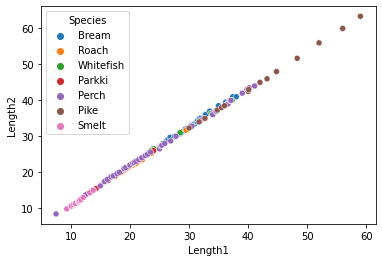

In [11]:
sns.scatterplot(data = df_fish , x = 'Length1' , y = 'Length2' , hue = 'Species')

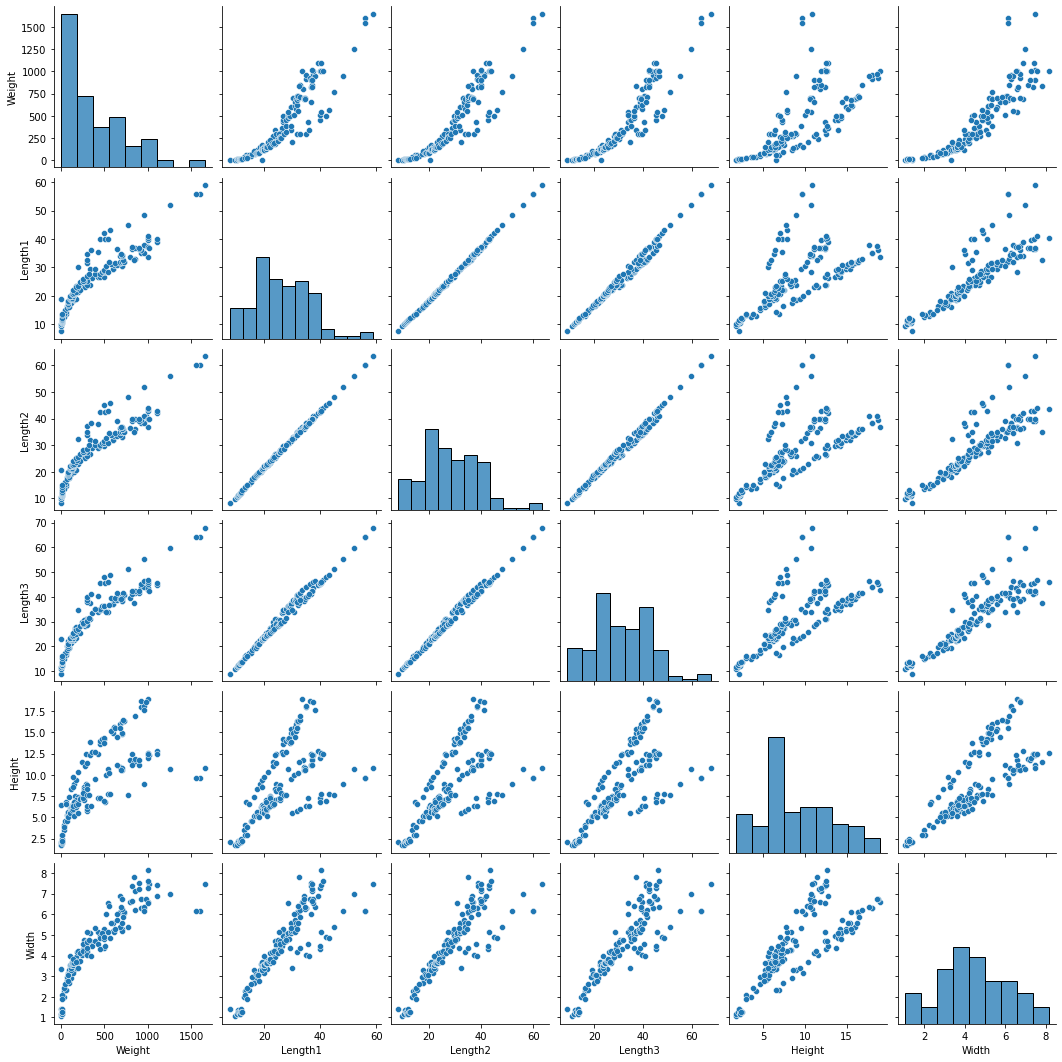

In [12]:
sns.pairplot(data = df_fish, vars = df_fish.columns[1:7])

### Thống kê missing value

In [13]:
df_fish.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Xử lí outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


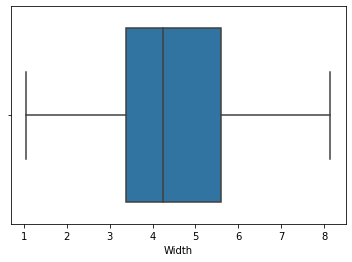

In [14]:
sns.boxplot(df_fish['Width'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


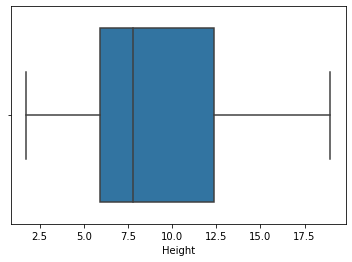

In [15]:
sns.boxplot(df_fish['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


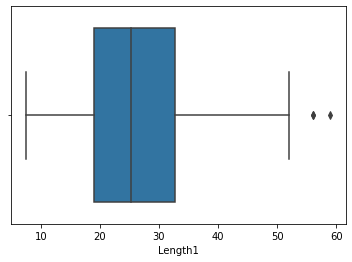

In [16]:
sns.boxplot(df_fish['Length1'])

In [17]:
Q1_Length1 = df_fish['Length1'].quantile(0.45)
Q3_Length1 = df_fish['Length1'].quantile(0.55)
print('Q1 =',Q1_Length1)
print('Q3 =',Q3_Length1)
IQR_Length1 = Q3_Length1 - Q1_Length1
low_fence_Length1 = Q1_Length1 - 1.5*IQR_Length1
up_fence_Length1 = Q3_Length1 + 1.5*IQR_Length1
print(df_fish[((df_fish['Length1'] < low_fence_Length1) | (df_fish['Length1'] > up_fence_Length1))])

Q1 = 23.630000000000003
Q3 = 26.770000000000003
    Species  Weight  Length1  Length2  Length3   Height   Width
22    Bream   620.0     31.5     34.5     39.7  15.5227  5.2801
23    Bream   680.0     31.8     35.0     40.6  15.4686  6.1306
24    Bream   700.0     31.9     35.0     40.5  16.2405  5.5890
25    Bream   725.0     31.8     35.0     40.9  16.3600  6.0532
26    Bream   720.0     32.0     35.0     40.6  16.3618  6.0900
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[83 rows x 7 columns]


In [18]:
df_fish = df_fish[~((df_fish['Length1'] < low_fence_Length1) | (df_fish['Length1'] > up_fence_Length1))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


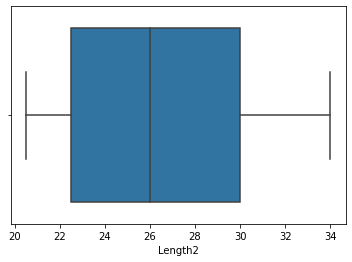

In [19]:
sns.boxplot(df_fish['Length2'])

In [20]:
Q1_Length2 = df_fish['Length2'].quantile(0.45)
Q3_Length2 = df_fish['Length2'].quantile(0.55)
print('Q1 =',Q1_Length2)
print('Q3 =',Q3_Length2)
IQR_Length2 = Q3_Length2 - Q1_Length2
low_fence_Length2 = Q1_Length2 - 1.5*IQR_Length2
up_fence_Length2 = Q3_Length2 + 1.5*IQR_Length2
print(df_fish[((df_fish['Length2'] < low_fence_Length2) | (df_fish['Length2'] > up_fence_Length2))])

Q1 = 25.15
Q3 = 26.5
       Species  Weight  Length1  Length2  Length3   Height   Width
3        Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4        Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5        Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6        Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7        Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8        Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9        Bream   500.0     28.5     30.7     36.2  14.2266  4.9594
10       Bream   475.0     28.4     31.0     36.2  14.2628  5.1042
11       Bream   500.0     28.7     31.0     36.2  14.3714  4.8146
12       Bream   500.0     29.1     31.5     36.4  13.7592  4.3680
13       Bream   340.0     29.5     32.0     37.3  13.9129  5.0728
14       Bream   600.0     29.4     32.0     37.2  14.9544  5.1708
15       Bream   600.0     29.4     32.0     37.2  15.4380  5.5800
16       Bream   700.0     30.4     33.0 

In [21]:
df_fish = df_fish[~((df_fish['Length2'] < low_fence_Length2) | (df_fish['Length2'] > up_fence_Length2))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


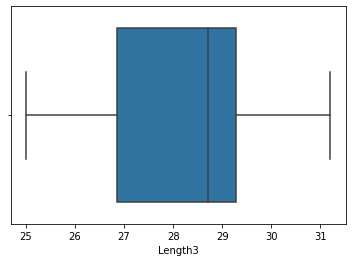

In [22]:
sns.boxplot(df_fish['Length3'])

In [23]:
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
48,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352
49,Roach,161.0,22.0,23.4,26.7,6.9153,3.6312


## Data Splitting

In [24]:
X = df_fish.iloc[:,2:7].values
y = df_fish.iloc[:,1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 0)

## Data Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [27]:
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

## Xây dựng model để predict

In [28]:
reg_fish = LinearRegression()
reg_fish.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
from sklearn.linear_model import SGDRegressor
reg_fish_sgd = SGDRegressor()
reg_fish_sgd.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [61]:
class LinearRegression_GD:
  def __init__(self, eta= 0.01, max_iter = 20, random_state= 1):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.cost = []
  def net_input(self, X):
    return np.dot(X,self.w[1:]) + self.w[0]
  def predict(self, X):
    return self.net_input(X)
  def fit(self, X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1+X.shape[1])
    self.costs = []
    for n_iters in range (self.max_iter):
      error = y - self.predict(X)
      self.w[1:] += self.eta * X.T.dot(error)
      self.w[0] += self.eta * error.sum()
      cost = (error**2).sum()/2
      self.costs.append(cost)

In [62]:
reg_GD = LinearRegression_GD(eta = 0.01, max_iter = 20, random_state= 1)
reg_GD.fit(X_train, y_train)

In [32]:
y_pred = reg_fish.predict(X_test)

In [33]:
y_pred_sgd = reg_fish_sgd.predict(X_test)

In [66]:
y_pred_gd = reg_GD.predict(X_test)

In [35]:
reg_fish.coef_

array([-88.97350516, 173.91717489, -35.29227325,  90.88380738,
        76.25085775])

In [36]:
reg_fish.intercept_

146.80706613620316

## Plotting the cost

In [63]:
def visualize_cost(self):
  plt.plot(range(1,len(self.costs)+1), self.costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Gradient Descent')
  plt.show()

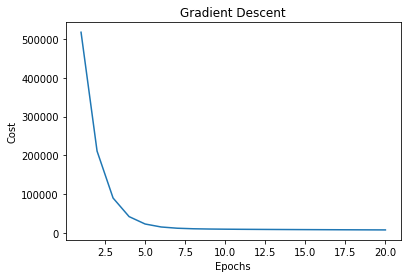

In [64]:
visualize_cost(reg_GD)

## Đánh giá model bằng MSE và R2 score

In [39]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error Normal Equation: ",mean_squared_error(y_test, y_pred, squared= False))
from sklearn.metrics import r2_score
print("R2 Score Normal Equation: ", r2_score(y_test, y_pred))

Mean Squared Error Normal Equation:  15.27874276367877
R2 Score Normal Equation:  0.9322466361851967


In [40]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error SGD: ",mean_squared_error(y_test, y_pred_sgd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score SGD: ", r2_score(y_test, y_pred_sgd))

Mean Squared Error SGD:  13.961300710850132
R2 Score SGD:  0.9434272374585856


In [67]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error GD: ",mean_squared_error(y_test, y_pred_gd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score GD: ", r2_score(y_test, y_pred_gd))

Mean Squared Error GD:  26.060123707852725
R2 Score GD:  0.8028900400403178


# Data Insurance

---


## Xử lí dữ liệu

In [68]:
df_insurance = pd.read_csv("/content/drive/MyDrive/10. Toán cho KHMT/As 3/Tutorial/data/insurance.csv")
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [69]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
df_insurance.head().style.background_gradient(cmap = 'YlGnBu')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200


In [71]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [72]:
print("Number of Rows: ", df_insurance.shape[0])
print("Number of Columns: ", df_insurance.shape[1])

Number of Rows:  1338
Number of Columns:  7


### Thống kê missing value

In [73]:
df_insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Xử lí outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


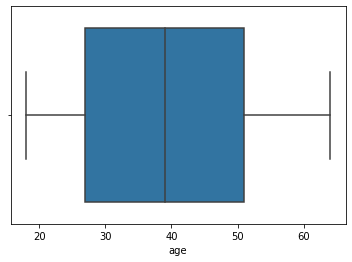

In [74]:
sns.boxplot(df_insurance['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


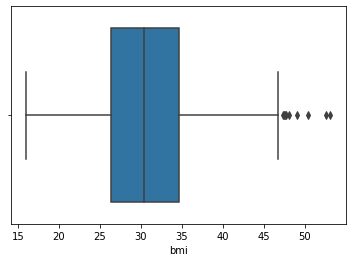

In [75]:
sns.boxplot(df_insurance['bmi'])

In [76]:
Q1_bmi = df_insurance['bmi'].quantile(0.25)
Q3_bmi = df_insurance['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
print('Q1 =',Q1_bmi)
print('Q3 =',Q3_bmi)
low_fence_bmi = Q1_bmi - 1.5*IQR_bmi
up_fence_bmi = Q3_bmi + 1.5*IQR_bmi

print(df_insurance[((df_insurance['bmi'] < low_fence_bmi) | (df_insurance['bmi'] > up_fence_bmi))])

Q1 = 26.29625
Q3 = 34.69375
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [77]:
df_insurance = df_insurance[~((df_insurance['bmi'] < low_fence_bmi) | (df_insurance['bmi'] > up_fence_bmi))]

In [78]:
df_insurance.reset_index(drop = True, inplace = True) # reset index

### One Hot Encoder and Label Encoder

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_insurance['sex'] = le.fit_transform(df_insurance['sex'])
df_insurance['smoker'] = le.fit_transform(df_insurance['smoker'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [80]:
df_insurance.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960


In [81]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [82]:
name_col = 'region'
data_new = ohe.fit_transform(df_insurance[[name_col]])
data_new

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [83]:
region_column = pd.DataFrame(data = data_new, columns= ohe.get_feature_names([name_col]))
region_column

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1324,0.0,1.0,0.0,0.0
1325,1.0,0.0,0.0,0.0
1326,0.0,0.0,1.0,0.0
1327,0.0,0.0,0.0,1.0


In [84]:
df_insurance = pd.concat([df_insurance.drop(columns=[name_col, 'charges']), region_column, df_insurance['charges']], axis=1)

In [85]:
df_insurance

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1324,50,1,30.970,3,0,0.0,1.0,0.0,0.0,10600.54830
1325,18,0,31.920,0,0,1.0,0.0,0.0,0.0,2205.98080
1326,18,0,36.850,0,0,0.0,0.0,1.0,0.0,1629.83350
1327,21,0,25.800,0,0,0.0,0.0,0.0,1.0,2007.94500


## Data Splitting

```
Chia dữ liệu
```



In [86]:
X = df_insurance.iloc[:,0:9]
y = df_insurance.iloc[:,-1]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Data Scaling

```
Chuẩn hóa dữ liệu
```



In [88]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [89]:
X_train[['bmi']] = min_max_scaler.fit_transform(X_train[['bmi']])
X_test[['bmi']] = min_max_scaler.fit_transform(X_test[['bmi']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [90]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1137,52,1,0.547007,3,0,0.0,1.0,0.0,0.0
980,43,1,0.460475,3,0,0.0,1.0,0.0,0.0
634,39,1,0.339948,0,1,1.0,0.0,0.0,0.0
817,26,1,0.055628,0,0,0.0,1.0,0.0,0.0
1001,47,1,0.398666,3,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
763,42,0,0.424203,1,0,0.0,0.0,0.0,1.0
835,59,0,0.500651,0,0,0.0,1.0,0.0,0.0
1216,41,1,0.259597,1,0,1.0,0.0,0.0,0.0
559,50,1,0.937215,1,0,0.0,0.0,1.0,0.0


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
X_train[['age']] = scaler.fit_transform(X_train[['age']])
X_test[['age']] = scaler.fit_transform(X_test[['age']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [93]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1137,0.928281,1,0.547007,3,0,0.0,1.0,0.0,0.0
980,0.290164,1,0.460475,3,0,0.0,1.0,0.0,0.0
634,0.006557,1,0.339948,0,1,1.0,0.0,0.0,0.0
817,-0.915168,1,0.055628,0,0,0.0,1.0,0.0,0.0
1001,0.573772,1,0.398666,3,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
763,0.219262,0,0.424203,1,0,0.0,0.0,0.0,1.0
835,1.424595,0,0.500651,0,0,0.0,1.0,0.0,0.0
1216,0.148360,1,0.259597,1,0,1.0,0.0,0.0,0.0
559,0.786477,1,0.937215,1,0,0.0,0.0,1.0,0.0


## Build model

```
Xây dựng model
```



In [94]:
from sklearn.linear_model import LinearRegression
reg_ins = LinearRegression()

In [95]:
from sklearn.linear_model import SGDRegressor
reg_ins_sgd = SGDRegressor()

In [96]:
reg_ins.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
reg_ins_sgd.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [107]:
reg_ins_GD = LinearRegression_GD(eta = 0.00001, max_iter = 200, random_state= 1)
reg_ins_GD.fit(X_train, y_train)
y_pred_ins_gd = reg_ins_GD.predict(X_test) 

In [99]:
reg_ins.intercept_

3088.4708098140236

In [100]:
reg_ins.coef_

array([ 3729.90434652,   177.57291473,  9540.03334848,   505.7121877 ,
       23371.17884528,   837.60626529,    99.44385219,  -257.8853352 ,
        -679.16478227])

In [101]:
y_pred = reg_ins.predict(X_test)

In [108]:
y_pred_sgd = reg_ins_sgd.predict(X_test)

## Plotting the cost

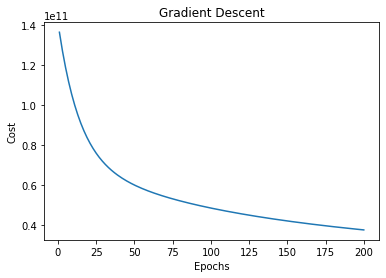

In [103]:
visualize_cost(reg_ins_GD)

## Đánh giá model bằng MSE và R2 score

In [104]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error Normal Equation: ",mean_squared_error(y_test, y_pred, squared= False))
from sklearn.metrics import r2_score
print("R2 Score Normal Equation: ", r2_score(y_test, y_pred))

Mean Squared Error Normal Equation:  6597.552478442291
R2 Score Normal Equation:  0.738391188249784


In [105]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error SGD: ",mean_squared_error(y_test, y_pred_sgd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score SGD: ", r2_score(y_test, y_pred_sgd))

Mean Squared Error SGD:  6647.786726718029
R2 Score SGD:  0.7343922043656574


In [106]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error GD: ",mean_squared_error(y_test, y_pred_ins_gd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score GD: ", r2_score(y_test, y_pred_ins_gd))

Mean Squared Error GD:  10316.609736170285
R2 Score GD:  0.36032310324626593


# Data wine

---



## Xử lí dữ liệu

In [139]:
df_wine = pd.read_csv("/content/drive/MyDrive/10. Toán cho KHMT/As 3/Tutorial/data/wine.csv")
df_wine.head().style.background_gradient(cmap='YlGnBu')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [140]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [141]:
df_wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [142]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Thống kê missing value

In [143]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Xử lí outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


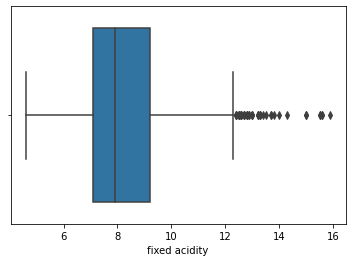

In [144]:
sns.boxplot(df_wine['fixed acidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


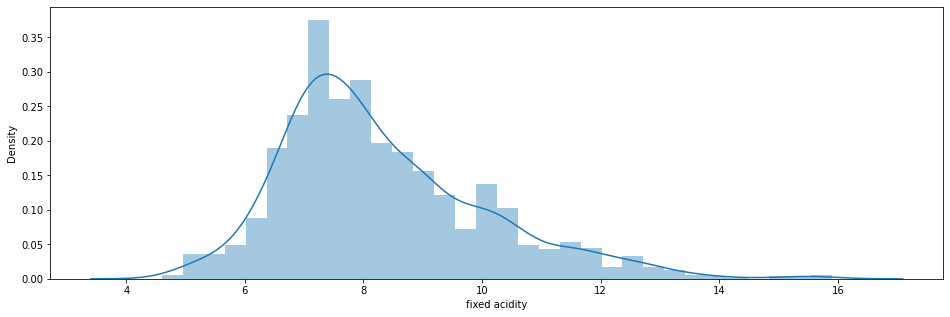

In [145]:
plt.figure(figsize=(16,5))
sns.distplot(df_wine['fixed acidity'])
plt.show()

In [146]:
Q1_fixed_acidity = df_wine['fixed acidity'].quantile(0.25)
Q3_fixed_acidity = df_wine['fixed acidity'].quantile(0.75)
IQR_fixed_acidity = Q3_fixed_acidity - Q1_fixed_acidity
print('Q1 =',Q1_fixed_acidity)
print('Q3 =',Q3_fixed_acidity)
low_fence_fixed_acidity = Q1_fixed_acidity - 1.5*IQR_fixed_acidity
up_fence_fixed_acidity = Q3_fixed_acidity + 1.5*IQR_fixed_acidity

print(df_wine[((df_wine['fixed acidity'] < low_fence_fixed_acidity) | (df_wine['fixed acidity'] > up_fence_fixed_acidity))])

Q1 = 7.1
Q3 = 9.2
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
205            12.8             0.300         0.74  ...       0.77     10.8        7
206            12.8             0.300         0.74  ...       0.77     10.8        7
243            15.0             0.210         0.44  ...       0.84      9.2        7
244            15.0             0.210         0.44  ...       0.84      9.2        7
264            12.5             0.560         0.49  ...       0.87     10.9        5
294            13.3             0.340         0.52  ...       0.81      9.5        6
328            13.4             0.270         0.62  ...       0.67      9.7        6
338            12.4             0.490         0.58  ...       1.00     11.5        6
339            12.5             0.280         0.54  ...       1.36      9.8        7
347            13.8             0.490         0.67  ...       0.93     12.0        6
353            13.5             0.530         0

In [147]:
df_wine = df_wine[~((df_wine['fixed acidity'] < low_fence_fixed_acidity) | (df_wine['fixed acidity'] > up_fence_fixed_acidity))]

In [148]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


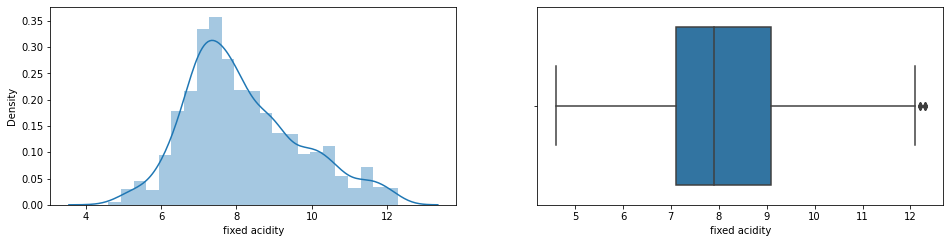

In [149]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_wine['fixed acidity'])
plt.subplot(2,2,2)
sns.boxplot(df_wine['fixed acidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


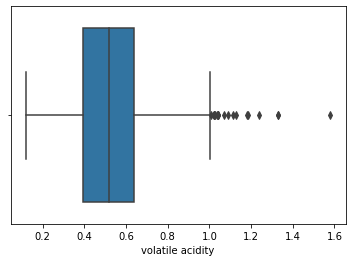

In [150]:
sns.boxplot(df_wine['volatile acidity'])

In [151]:
Q1_volatile_acidity = df_wine['volatile acidity'].quantile(0.25)
Q3_volatile_acidity = df_wine['volatile acidity'].quantile(0.75)
IQR_volatile_acidity = Q3_volatile_acidity - Q1_volatile_acidity
print('Q1 =',Q1_volatile_acidity)
print('Q3 =',Q3_volatile_acidity)
low_fence_volatile_acidity = Q1_volatile_acidity - 1.5*IQR_volatile_acidity
up_fence_volatile_acidity = Q3_volatile_acidity + 1.5*IQR_volatile_acidity

print(df_wine[((df_wine['volatile acidity'] < low_fence_volatile_acidity) | (df_wine['volatile acidity'] > up_fence_volatile_acidity))])

Q1 = 0.395
Q3 = 0.64
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
38              5.7             1.130         0.09  ...       0.48      9.8        4
94              5.0             1.020         0.04  ...       0.48     10.5        4
120             7.3             1.070         0.09  ...       0.57      9.0        5
126             8.2             1.330         0.00  ...       0.49     10.9        5
127             8.1             1.330         0.00  ...       0.48     10.9        5
134             7.9             1.040         0.05  ...       0.55      9.9        6
199             6.9             1.090         0.06  ...       0.43     11.4        4
553             5.0             1.040         0.24  ...       0.62     11.5        5
672             9.8             1.240         0.34  ...       0.53      9.5        5
690             7.4             1.185         0.00  ...       0.54     10.7        3
700            10.6             1.020       

In [152]:
df_wine = df_wine[~((df_wine['volatile acidity'] < low_fence_volatile_acidity) | (df_wine['volatile acidity'] > up_fence_volatile_acidity))]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


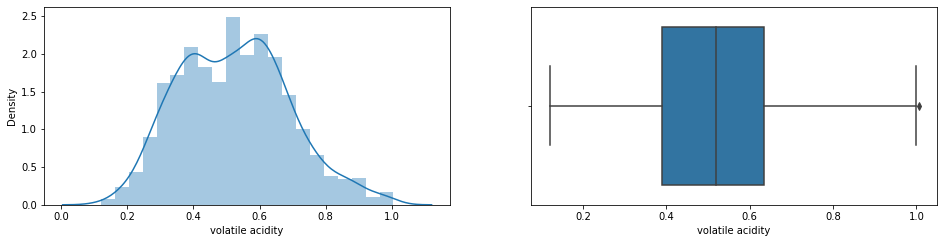

In [153]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_wine['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(df_wine['volatile acidity'])

In [154]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1530 non-null   float64
 1   volatile acidity      1530 non-null   float64
 2   citric acid           1530 non-null   float64
 3   residual sugar        1530 non-null   float64
 4   chlorides             1530 non-null   float64
 5   free sulfur dioxide   1530 non-null   float64
 6   total sulfur dioxide  1530 non-null   float64
 7   density               1530 non-null   float64
 8   pH                    1530 non-null   float64
 9   sulphates             1530 non-null   float64
 10  alcohol               1530 non-null   float64
 11  quality               1530 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 155.4 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


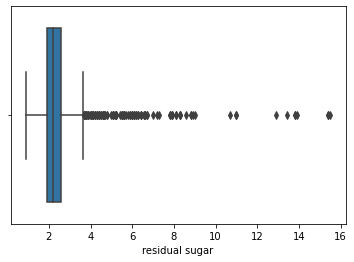

In [155]:
sns.boxplot(df_wine['residual sugar'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


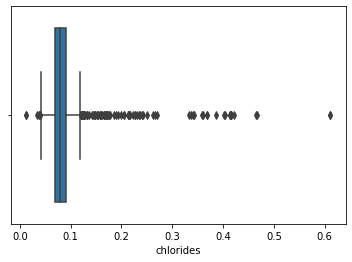

In [156]:
sns.boxplot(df_wine['chlorides'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


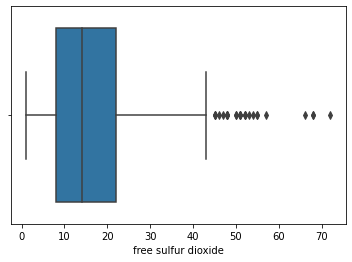

In [157]:
sns.boxplot(df_wine['free sulfur dioxide'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


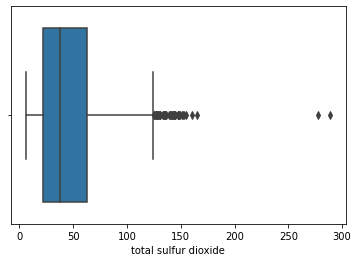

In [158]:
sns.boxplot(df_wine['total sulfur dioxide'])


## Data Splitting

In [159]:
X = df_wine.iloc[:,0:11]
y = df_wine.iloc[:,-1]

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 0)

## Data Scaling

In [161]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

## Build model

In [162]:
from sklearn.linear_model import LinearRegression
reg_wine = LinearRegression()
reg_wine.fit(X_train,y_train)
y_pred_NE = reg_wine.predict(X_test)

In [163]:
from sklearn.linear_model import SGDRegressor
reg_wine_sgd = SGDRegressor()
reg_wine_sgd.fit(X_train,y_train)
y_pred_sgd = reg_wine_sgd.predict(X_test)

In [164]:
reg_wine_GD = LinearRegression_GD(eta = 0.00001, max_iter = 1000, random_state= 1)
reg_wine_GD.fit(X_train, y_train)
y_pred_wine_gd = reg_wine_GD.predict(X_test) 

## Plotting the cost

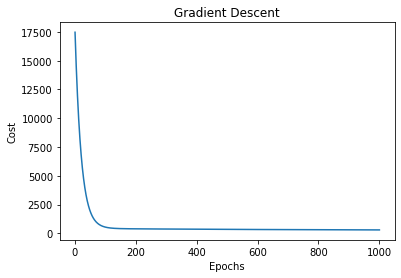

In [165]:
visualize_cost(reg_wine_GD)

## Đánh giá model bằng MSE và R2 score

In [166]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error Normal Equation: ",mean_squared_error(y_test, y_pred_NE, squared= False))
from sklearn.metrics import r2_score
print("R2 Score Normal Equation: ", r2_score(y_test, y_pred_NE))

Mean Squared Error Normal Equation:  0.6656899682068201
R2 Score Normal Equation:  0.3274514935667593


In [167]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error SGD: ",mean_squared_error(y_test, y_pred_sgd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score SGD: ", r2_score(y_test, y_pred_sgd))

Mean Squared Error SGD:  0.7456983466346735
R2 Score SGD:  0.15607092712086124


In [168]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error GD: ",mean_squared_error(y_test, y_pred_wine_gd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score GD: ", r2_score(y_test, y_pred_wine_gd))

Mean Squared Error GD:  0.7966281134022383
R2 Score GD:  0.03685683803063189


# Data weather

---



## Xử lí dữ liệu

In [169]:
df_weather = pd.read_csv("/content/drive/MyDrive/10. Toán cho KHMT/As 3/Tutorial/data/weather.csv")
df_weather

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [170]:
df_weather.head().style.background_gradient(cmap='YlGnBu')

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.920000,11.270000,130,8.050000,1021.600000,0,Cold
1,21.111111,0.730000,20.930000,330,16.100000,1017.000000,1,Warm
2,16.600000,0.970000,5.973100,193,14.908600,1013.990000,1,Normal
3,1.600000,0.820000,3.220000,300,16.100000,1031.590000,1,Cold
4,2.194444,0.600000,10.883600,116,9.982000,1020.880000,1,Cold


In [171]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


### Thống kê missing value

In [172]:
df_weather.isna().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

### Xử lí outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


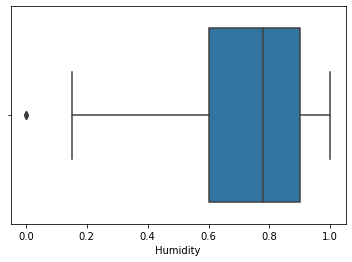

In [173]:
sns.boxplot(df_weather['Humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


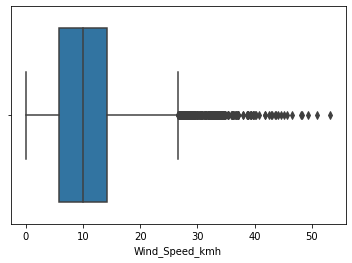

In [174]:
sns.boxplot(df_weather['Wind_Speed_kmh'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


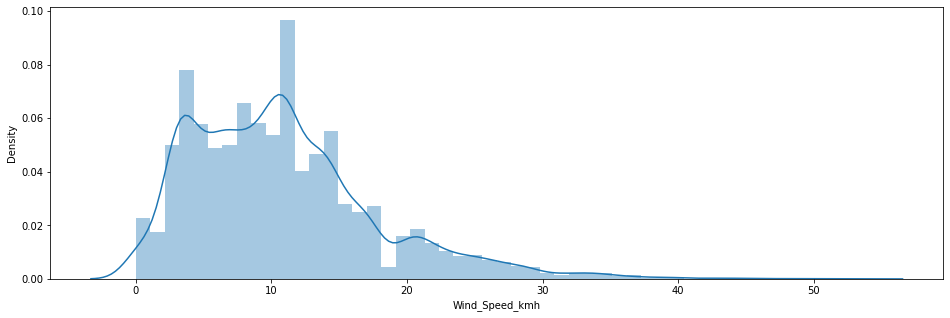

In [175]:
plt.figure(figsize=(16,5))
sns.distplot(df_weather['Wind_Speed_kmh'])
plt.show()

In [176]:
Q1_Wind_Speed_kmh = df_weather['Wind_Speed_kmh'].quantile(0.25)
Q3_Wind_Speed_kmh = df_weather['Wind_Speed_kmh'].quantile(0.75)
IQR_Wind_Speed_kmh = Q3_Wind_Speed_kmh - Q1_Wind_Speed_kmh
print('Q1 =',Q1_Wind_Speed_kmh)
print('Q3 =',Q3_Wind_Speed_kmh)
low_fence_Wind_Speed_kmh = Q1_Wind_Speed_kmh - 1.5*IQR_Wind_Speed_kmh
up_fence_Wind_Speed_kmh = Q3_Wind_Speed_kmh + 1.5*IQR_Wind_Speed_kmh

print(df_weather[((df_weather['Wind_Speed_kmh'] < low_fence_Wind_Speed_kmh) | (df_weather['Wind_Speed_kmh'] > up_fence_Wind_Speed_kmh))])

Q1 = 5.7477
Q3 = 14.1036
      Temperature_c  Humidity  ...  Rain  Description
50         9.050000      0.61  ...     1       Normal
56        12.788889      0.78  ...     1       Normal
71         6.088889      0.65  ...     1       Normal
87         7.316667      0.77  ...     1       Normal
182       10.000000      0.89  ...     1       Normal
...             ...       ...  ...   ...          ...
9847      15.038889      0.42  ...     1       Normal
9867       1.111111      0.85  ...     1         Cold
9904       6.022222      0.79  ...     1       Normal
9954      16.016667      0.27  ...     1       Normal
9978       6.144444      0.69  ...     1       Normal

[335 rows x 8 columns]


In [177]:
df_weather = df_weather[~((df_weather['Wind_Speed_kmh'] < low_fence_Wind_Speed_kmh) | (df_weather['Wind_Speed_kmh'] > up_fence_Wind_Speed_kmh))]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


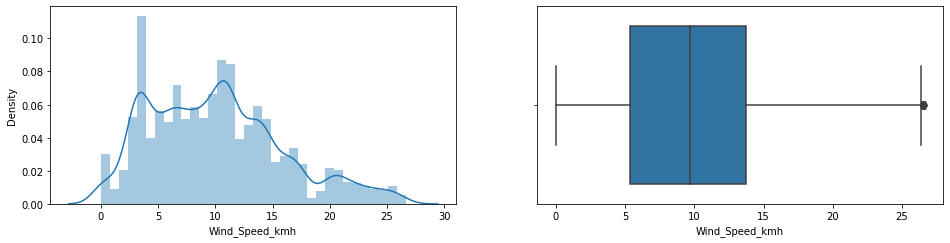

In [178]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_weather['Wind_Speed_kmh'])
plt.subplot(2,2,2)
sns.boxplot(df_weather['Wind_Speed_kmh'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


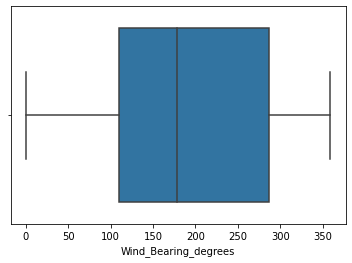

In [179]:
sns.boxplot(df_weather['Wind_Bearing_degrees'])

### One Hot Encoder and Label Encoder

In [180]:
df_weather.reset_index(drop= True, inplace= True)

(array([1.2571133 , 0.        , 0.        , 0.        , 0.        ,
        1.27004656, 0.        , 0.        , 0.        , 2.47284014]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

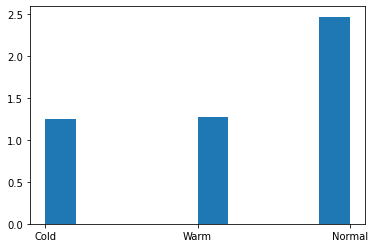

In [181]:
plt.hist(df_weather['Description'], density=True)

In [182]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [183]:
name_col = 'Description'

In [184]:
data_new_weather = ohe.fit_transform(df_weather[[name_col]])

In [185]:
data_new_weather

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [186]:
description_column = pd.DataFrame(data = data_new_weather, columns= ohe.get_feature_names([name_col]))

In [187]:
description_column

,Description_Cold,Description_Normal,Description_Warm
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
9660,0.0,1.0,0.0
9661,0.0,1.0,0.0
9662,0.0,1.0,0.0
9663,0.0,1.0,0.0


In [188]:
df_weather = pd.concat([df_weather.drop(columns=[name_col]), description_column], axis=1)

In [189]:
df_weather.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Cold,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,1.0,0.0,0.0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0.0,0.0,1.0
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,0.0,1.0,0.0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,1.0,0.0,0.0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,1.0,0.0,0.0


## Data Splitting




In [190]:
X = df_weather.iloc[:,1:10]
y = df_weather.iloc[:,0]

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

## Data Scaling




In [192]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [193]:
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

## Build model

In [194]:
from sklearn.linear_model import LinearRegression
reg_wine = LinearRegression()
reg_wine.fit(X_train,y_train)
y_pred_NE = reg_wine.predict(X_test)

In [195]:
from sklearn.linear_model import SGDRegressor
reg_wine_sgd = SGDRegressor()
reg_wine_sgd.fit(X_train,y_train)
y_pred_sgd = reg_wine_sgd.predict(X_test)

In [196]:
reg_weather_GD = LinearRegression_GD(eta = 0.00001, max_iter = 200, random_state= 1)
reg_weather_GD.fit(X_train, y_train)
y_pred_weather_gd = reg_weather_GD.predict(X_test) 

## Plotting the cost

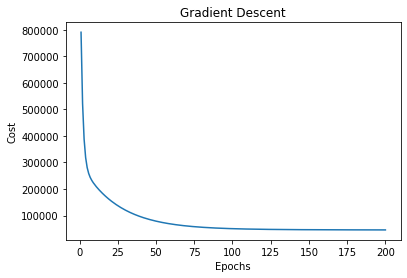

In [197]:
visualize_cost(reg_weather_GD)

## Đánh giá model bằng MSE và R2 score

In [198]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error Normal Equation: ",mean_squared_error(y_test, y_pred_NE, squared= False))
from sklearn.metrics import r2_score
print("R2 Score Normal Equation: ", r2_score(y_test, y_pred_NE))

Mean Squared Error Normal Equation:  3.470068022167414
R2 Score Normal Equation:  0.8669961664198066


In [199]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error SGD: ",mean_squared_error(y_test, y_pred_sgd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score SGD: ", r2_score(y_test, y_pred_sgd))

Mean Squared Error SGD:  3.463254217816716
R2 Score SGD:  0.8675179846255395


In [200]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error GD: ",mean_squared_error(y_test, y_pred_weather_gd, squared= False))
from sklearn.metrics import r2_score
print("R2 Score GD: ", r2_score(y_test, y_pred_weather_gd))

Mean Squared Error GD:  3.581002268029765
R2 Score GD:  0.8583562635137865
